Name : Anmol Narayan 


# Question
1. Implement Linear Discriminant Analysis as a function. The function should take data points as inputs and should return the data in the reduced space.

In [1]:
import pandas as pd
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Linear Discriminant Analysis (LDA) on the dataset.
### Parameters:
- X : numpy array, shape (n_samples, n_features)
        The input data (data points).
- y : numpy array, shape (n_samples,)
        The class labels.
- n_components : int, optional
        Number of components for dimensionality reduction (must be less than or equal to the number of classes - 1).

### Returns:
X_lda : numpy array, shape (n_samples, n_components) The transformed data in the reduced space.

In [2]:
def lda(X, y, n_components):
    class_labels = np.unique(y)
    mean_vectors = [np.mean(X[y == label], axis=0) for label in class_labels]
    
    S_W = np.zeros((X.shape[1], X.shape[1]))
    for label, mean_vec in zip(class_labels, mean_vectors):
        class_scatter = np.zeros((X.shape[1], X.shape[1]))
        for row in X[y == label]:
            row, mean_vec = row.reshape(X.shape[1], 1), mean_vec.reshape(X.shape[1], 1)
            class_scatter += (row - mean_vec).dot((row - mean_vec).T)
        S_W += class_scatter
    
    overall_mean = np.mean(X, axis=0).reshape(X.shape[1], 1)
    S_B = np.zeros((X.shape[1], X.shape[1]))
    for i, mean_vec in enumerate(mean_vectors):
        n = X[y == class_labels[i]].shape[0]
        mean_vec = mean_vec.reshape(X.shape[1], 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    
    eigvals, eigvecs = eigh(np.linalg.inv(S_W).dot(S_B))
    eigvecs = eigvecs[:, np.argsort(eigvals)[::-1]]
    eigvecs = eigvecs[:, :n_components]
    
    X_lda = X.dot(eigvecs)
    
    return X_lda, eigvecs

In [3]:
import pandas as pd
df = pd.read_csv("iris.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
x_lda ,eigvecs= lda(X,y,2)
x_lda

array([[ 2.01066147, -1.50200809],
       [ 2.02015548, -1.13379507],
       [ 1.87302014, -1.36463802],
       [ 2.00435318, -1.36208674],
       [ 1.97325658, -1.62943933],
       [ 2.38173563, -1.82464875],
       [ 1.95899072, -1.60999971],
       [ 2.06966894, -1.47543729],
       [ 1.90539143, -1.23688655],
       [ 2.01734434, -1.24192524],
       [ 2.1349847 , -1.58878783],
       [ 2.09127152, -1.57629772],
       [ 1.93170069, -1.16731538],
       [ 1.58791656, -1.28735906],
       [ 1.98332378, -1.6300798 ],
       [ 2.25295198, -2.10640226],
       [ 2.09243338, -1.72857064],
       [ 2.07375477, -1.50690824],
       [ 2.40677019, -1.61547646],
       [ 2.10995014, -1.79796012],
       [ 2.31576602, -1.36979454],
       [ 2.18508683, -1.71384948],
       [ 1.58250838, -1.68704302],
       [ 2.44100485, -1.41074554],
       [ 2.3082482 , -1.6483563 ],
       [ 2.19016809, -1.14341368],
       [ 2.2681811 , -1.50925711],
       [ 2.10834852, -1.48760717],
       [ 2.04806636,

# Question
2. In the Iris dataset, choose the first 2 features, i.e. sepal length and sepal width.
   1. Run your code on this Iris dataset and obtain the linear discriminant.
   2. Plot the linear discriminant in the original space. Further, show the transformed data.
   3. Find the distance between the projected means of the two classes.

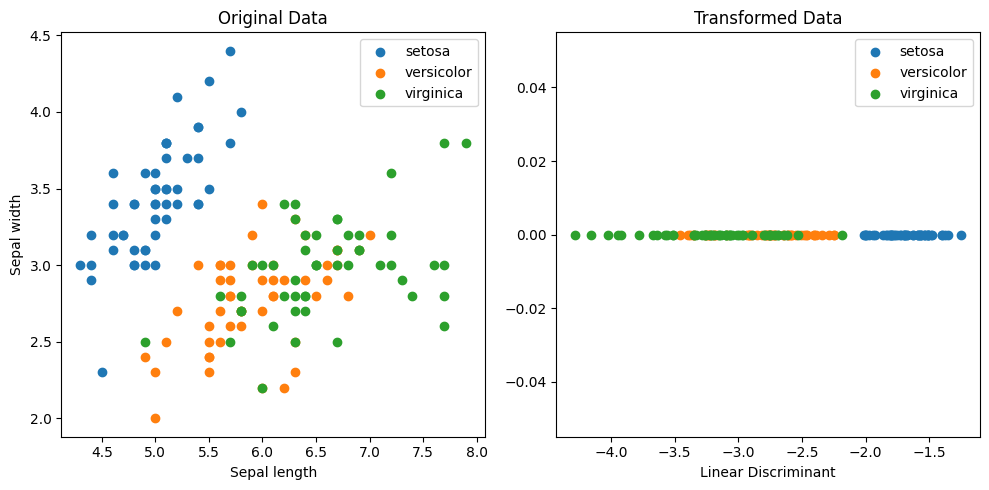

Distance between projected means of the first two classes: 1.1360649950277086


In [4]:

# LDA function
# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Select the first two features
y = iris.target

# Run LDA
X_lda, eigvecs = lda(X, y, n_components=1)

# Plot the linear discriminant in the original space
plt.figure(figsize=(10, 5))

# Original data
plt.subplot(1, 2, 1)
for label in np.unique(y):
    plt.scatter(X[y == label, 0], X[y == label, 1], label=iris.target_names[label])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Original Data')
plt.legend()

# Transformed data
plt.subplot(1, 2, 2)
for label in np.unique(y):
    plt.scatter(X_lda[y == label], np.zeros_like(X_lda[y == label]), label=iris.target_names[label])
plt.xlabel('Linear Discriminant')
plt.title('Transformed Data')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate the distance between the projected means of the two classes
mean_vectors_lda = [np.mean(X_lda[y == label], axis=0) for label in np.unique(y)]
distance = np.linalg.norm(mean_vectors_lda[0] - mean_vectors_lda[1])
print(f'Distance between projected means of the first two classes: {distance}')

# Question
- Generate a binary dataset (200 samples in each class ) with mean [2,2],[6,-2] and covariance matrix being [1, 1.5; 1.5, 3] respectively.
  - Perform dimension reduction using PCA and obtain the transformed data using only the first PC.
  - Perform Dimension reduction using LDA and obtain the transformed data using the linear discriminant.
  - Compare the accuracy of classification on the original, PCA and

LDA-transformed datasets ( For this task you can use any inbuilt supervised classifier ). Briefly explain your observations from empirical analysis of the classification accuracies in the aforementioned cases.

In [5]:
# PCA function
def pca(X, n_components):
    # Center the data
    X_centered = X - np.mean(X, axis=0)
    
    # Compute the covariance matrix
    covariance_matrix = np.cov(X_centered, rowvar=False)

    # Compute the eigenvalues and eigenvectors
    eigvals, eigvecs = np.linalg.eigh(covariance_matrix)

    # Sort the eigenvectors by eigenvalues in descending order
    sorted_indices = np.argsort(eigvals)[::-1]
    eigvecs = eigvecs[:, sorted_indices]

    # Select the top n_components eigenvectors
    eigvecs = eigvecs[:, :n_components]

    # Transform the data
    X_pca = X_centered.dot(eigvecs)

    return X_pca

Accuracy on original data: 1.0
Accuracy on PCA-transformed data: 0.9916666666666667
Accuracy on LDA-transformed data: 1.0


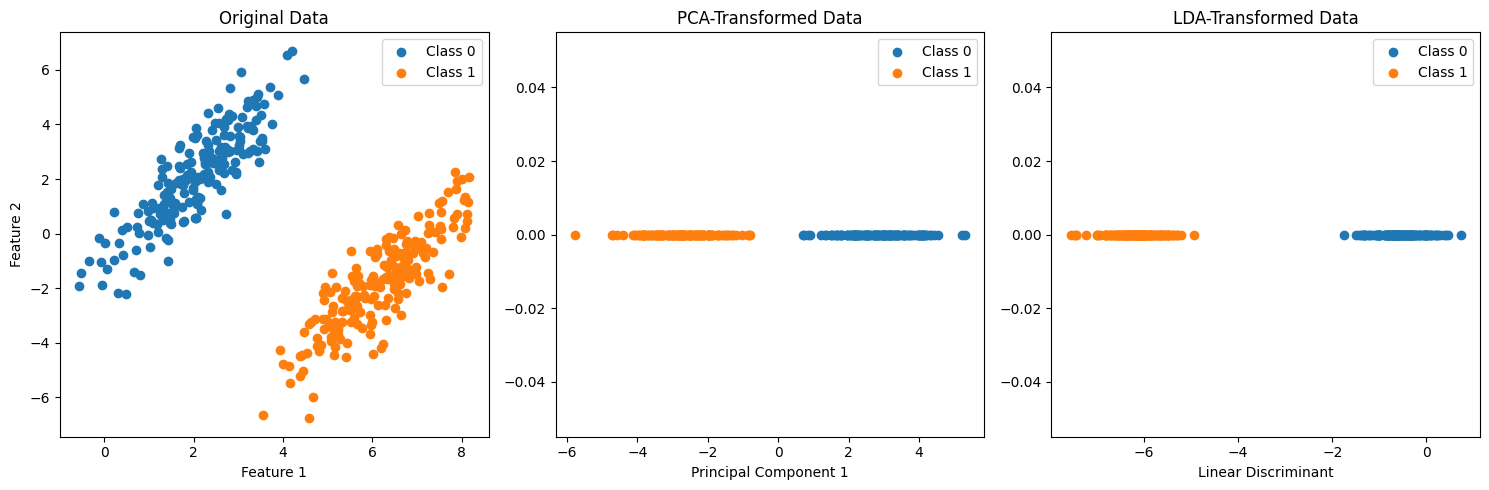

In [6]:


# Generate the binary dataset
np.random.seed(0)
mean1 = [2, 2]
mean2 = [6, -2]
cov = [[1, 1.5], [1.5, 3]]
class1 = np.random.multivariate_normal(mean1, cov, 200)
class2 = np.random.multivariate_normal(mean2, cov, 200)
X = np.vstack((class1, class2))
y = np.hstack((np.zeros(200), np.ones(200)))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Perform PCA
X_train_pca = pca(X_train, n_components=1)
X_test_pca = pca(X_test, n_components=1)

# Perform LDA

X_train_lda,eigvecs = lda(X_train, y_train, n_components=1)
X_test_lda,eigvecs = lda(X_test, y_test, n_components=1)

# Train and evaluate classifiers
clf_original = LogisticRegression().fit(X_train, y_train)
clf_pca = LogisticRegression().fit(X_train_pca, y_train)
clf_lda = LogisticRegression().fit(X_train_lda, y_train)

y_pred_original = clf_original.predict(X_test)
y_pred_pca = clf_pca.predict(X_test_pca)
y_pred_lda = clf_lda.predict(X_test_lda)

accuracy_original = accuracy_score(y_test, y_pred_original)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
accuracy_lda = accuracy_score(y_test, y_pred_lda)

print(f'Accuracy on original data: {accuracy_original}')
print(f'Accuracy on PCA-transformed data: {accuracy_pca}')
print(f'Accuracy on LDA-transformed data: {accuracy_lda}')

# Plot the results
plt.figure(figsize=(15, 5))

# Original data
plt.subplot(1, 3, 1)
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data')
plt.legend()

# PCA-transformed data
plt.subplot(1, 3, 2)
plt.scatter(X_train_pca[y_train == 0], np.zeros_like(X_train_pca[y_train == 0]), label='Class 0')
plt.scatter(X_train_pca[y_train == 1], np.zeros_like(X_train_pca[y_train == 1]), label='Class 1')
plt.xlabel('Principal Component 1')
plt.title('PCA-Transformed Data')
plt.legend()

# LDA-transformed data
plt.subplot(1, 3, 3)
plt.scatter(X_train_lda[y_train == 0], np.zeros_like(X_train_lda[y_train == 0]), label='Class 0')
plt.scatter(X_train_lda[y_train == 1], np.zeros_like(X_train_lda[y_train == 1]), label='Class 1')
plt.xlabel('Linear Discriminant')
plt.title('LDA-Transformed Data')
plt.legend()

plt.tight_layout()
plt.show()

## Observations
- Original Data: The classifier trained on the original data should perform well as it has access to all the features.
- PCA-Transformed Data: PCA reduces the dimensionality by capturing the maximum variance. The classifier may perform slightly worse than on the original data as some information might be lost.
- LDA-Transformed Data: LDA reduces the dimensionality by maximizing class separability. The classifier should perform well, potentially better than PCA, as LDA focuses on class discrimination.